# Training IELTS Lexical Model
---
***Last Run 9 Jun 2023 10:37 AM***

This notebook are used to training IELTS Lexical Model. This model are build with [Transformers DistilBERT](https://huggingface.co/docs/transformers/model_doc/distilbert) model and [TensorFlow Keras](https://keras.io/getting_started/). Training process will be devide into 2 section Pre-training and Fine-tuning. The pre-training process is training a model with frezee the DistilBERT layer. The fine-tuning process is training a model with unfrezee the DistilBERT layer. 

The dataset that we use is the dataset that we have done the preprocessing process. Here are the [Colab](https://colab.research.google.com/drive/1TlGOSt1Ga-RNAl6_N1wsmCxFKHDqOuuW?usp=sharing) or [Github](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Lexical) links to the dataset preprocessing process for the Lexical Model. And these are the link for dataset cvs files are saved in this link [OneDrive](https://telkomuniversityofficial.sharepoint.com/:f:/s/TAPurwokerto/EjfughuQWnNOuSuFtXAyodAB0EIv_8wGtQ-uY5ziZqahOw?e=yXH2lF) or [Drive](https://drive.google.com/drive/folders/1PhhJPPDZzMzOwBUXv861lVRGd2GeNg6p?usp=share_link).

In this notebook there are several process to train model.

1.   Get device information.
2.   Load dataset.
3.   Tokenization.
4.   Training.
5.   Evaluate and predict.
6.   Save model.
7.   Tensorboard.
8.   Load model.

To train model, there are several library to use in this process. Required library:

1.   OS.
2.   Pandas.
3.   Numpy.
4.   Seaborn.
5.   Matplotlib.
7.   Scikit-Learn.
8.   Transformers.
9.   TensorFlow GPU.
10.  Datetime.
11.  Time.
12.  Tensorboard.
13.  Wordcloud.

This notebook are save in [Colab](https://colab.research.google.com/drive/1uokU0HjCf-tcKipRQcey7Tn__ntbhyUk?usp=sharing) or [Github](https://github.com/IELTSSpeakingApplication/MachineLearning/tree/main/Training/Lexical). The models result are save in [Drive](https://drive.google.com/drive/folders/1jDoweDzmIxM9UwUiPcbkJXznPs7UuoDx?usp=share_link) or [OneDrive](https://telkomuniversityofficial.sharepoint.com/:f:/s/TAPurwokerto/Eq0GVQwiBvdPrXWoJQyBfSYBBlGSY1pDG-ibtgg8FLuMcA?e=S2SCd4)

***Training process required GPU and high Memory***

---
For comparison of model results, we carry out the training process with various types of model architecture but still use the same dataset which consists of 2265 data per class. We did some training because we have tried one basic architecture but the results were not optimal (*overfitting*). So we decided to prepare several models with several architectures to get the best results.

In this experiment, we use a basic architecture with *Kernel Regularizer* and *Early Stopping Callback*.

1.   DistilBERT.
2.   Dropout.
3.   Dense.
4.   Dropout.
5.   Output.



In [1]:
# Define global variable
TITLE_PRE = '"IELTS Lexical Model Pre-training"'
DESCRIPTION_PRE = '"Pre-training IELTS Lexical Model with DistilBERT and Keras Version 4"'
TITLE_FINE = '"IELTS Lexical Model Fine-tuning"'
DESCRIPTION_FINE = '"Fine-tuning IELTS Lexical Model with DistilBERT and Keras Version 4"'

DATASET_PATH = "/content/drive/MyDrive/Final Project/Machine Learning/Lexical/Dataset/CSV/"

CSV_DATASET = "all-6k.csv"
CSV_DATASET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Dataset/CSV'''

PNG = ".png"

CLASS_DISTRIBUTION = '"Training Dataset"'
BOXPLOT = '"Boxplot Dataset"'
WORDS_COUNT = '"Training Dataset Words Count"'
A1 = '"A1 Word Cloud"'
A2 = '"A2 Word Cloud"'
B1 = '"B1 Word Cloud"'
B2 = '"B2 Word Cloud"'
C1 = '"C1 Word Cloud"'
C2 = '"C2 Word Cloud"'

COLAB_BASE_PATH = "/content/"
DRIVE_TARGET_PATH = '''/content/drive/MyDrive/"Final Project"/"Machine Learning"/Lexical/Model/"Version 4"'''

MODEL_NAME = "IELTS_Lexical_Model_Version_4"
MODEL_SUMMARY = "Summary_" + MODEL_NAME + ".txt"

MODEL_EVALUATION = '"Model Evaluation"'
LOSS_EVALUATION = '"Loss Evaluation"'
ACCURACY_EVALUATION = '"Accuracy Evaluation"'
CM_EVALUATION = '"Confusion Matrix Evaluation"'
CR_EVALUATION = '"Classification Report Evaluation"'
TRAINING_TIME = '"Training Time"'

MODEL_EVALUATION_PNG = "Model Evaluation.png"
LOSS_EVALUATION_PNG = "Loss Evaluation.png"
ACCURACY_EVALUATION_PNG = "Accuracy Evaluation.png"
CM_EVALUATION_PNG = "Confusion Matrix Evaluation.png"
CR_EVALUATION_PNG = "Classification Report Evaluation.png"
TRAINING_TIME_PNG = "Training Time.png"

H5_MODEL_NAME = "ielts_lexical_model.h5"
FOLDER_MODEL_NAME = "ielts_lexical_model"
TOKENIZER_NAME = "ielts_lexical_tokenizer.pickle"

TENSORBOARD_LOG_PRE = "logs-pre-training"
TENSORBOARD_LOG_FINE = "logs-fine-tuning"

In [2]:
# Define params
params = {
    "MAX_LENGTH": 512,
    "EPOCHS": 70,
    "LEARNING_RATE": 1e-4,
    "FT_EPOCHS": 50,
    'FT_LEARNING_RATE': 1e-5,
    "OPTIMIZER": "adam",
    "FL_GAMMA": 2.0,
    "FL_ALPHA": 0.2,
    "BATCH_SIZE": 16,
    "VERBOSE": 1,
    "NUM_STEPS": 3840 // 16,
    "DISTILBERT_DROPOUT": 0.5,
    "DISTILBERT_ATT_DROPOUT": 0.5,
    "LAYER_DROPOUT": 0.5,
    "DENSE_ACTIVATION": "tanh",
    "LSTM_ACTIVATION": "tanh",
    "OUTPUT_ACTIVATION": "softmax",
    "DENSE_BIAS": "zeros",
    "KERNEL_INITIALIZER": "GlorotNormal",
    "KERNEL_REGULARIZERS": 0.01,
    "BIAS_INITIALIZER": "zeros",
    "POS_PROBA_THRESHOLD": 0.5,          
    "ADDED_LAYERS": "Dense 128, Dropout 0.5",
    "LR_SCHEDULE": "1e-4 for 70 epochs, Fine-tune w/ adam for 60 epochs @1e-5",
    "FREEZING": "All DistilBERT layers frozen for 70 epochs, then unfrozen for 60",
    "RANDOM_STATE": 42,
}

## Device info 🆗

In [3]:
# Get GPU type
!nvidia-smi

Fri Jun  9 02:41:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Get know server location
!curl ipinfo.io

{
  "ip": "35.233.189.176",
  "hostname": "176.189.233.35.bc.googleusercontent.com",
  "city": "Salem",
  "region": "Oregon",
  "country": "US",
  "loc": "44.9429,-123.0351",
  "org": "AS396982 Google LLC",
  "postal": "97308",
  "timezone": "America/Los_Angeles",
  "readme": "https://ipinfo.io/missingauth"
}

In [5]:
# Know is GPU working in TensorFlow
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available: 1


In [6]:
# Know CPU working in TensorFlow
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4060491858775507432
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15208677376
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13082555164578963208
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [7]:
# Know RAM info
!cat /proc/meminfo

MemTotal:       26687692 kB
MemFree:        21531940 kB
MemAvailable:   24126712 kB
Buffers:           90828 kB
Cached:          2797972 kB
SwapCached:            0 kB
Active:           679548 kB
Inactive:        4077236 kB
Active(anon):        972 kB
Inactive(anon):  1878600 kB
Active(file):     678576 kB
Inactive(file):  2198636 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               540 kB
Writeback:             0 kB
AnonPages:       1866580 kB
Mapped:           756688 kB
Shmem:             11556 kB
KReclaimable:      80780 kB
Slab:             129328 kB
SReclaimable:      80780 kB
SUnreclaim:        48548 kB
KernelStack:        5256 kB
PageTables:        28816 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13343844 kB
Committed_AS:    3573844 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       76804 kB
VmallocChunk:          0 kB
Percpu:          

In [8]:
# Know CPU info
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

## Load dataset 🆗

### Import library ✅

In [9]:
# Import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

### Define function ✅

In [10]:
# Define function for display length dataset
def vis_data(df, title):
    plt_title = title
    category_count = df["Level"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x = category_count.index, y = category_count )

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black", 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

In [11]:
# Define function for display boxplot
def box_plot(df, title):
    plt_title = title
    a1 = df["Text Count"].loc[df["Level"]=="A1"].values
    a2 = df["Text Count"].loc[df["Level"]=="A2"].values
    b1 = df["Text Count"].loc[df["Level"]=="B1"].values
    b2 = df["Text Count"].loc[df["Level"]=="B2"].values
    c1 = df["Text Count"].loc[df["Level"]=="C1"].values
    c2 = df["Text Count"].loc[df["Level"]=="C2"].values
    all = [a1, a2, b1, b2, c1, c2]

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    bp = ax.boxplot(all, labels=["A1", "A2", "B1", "B2", "C1", "C2"]) 

    plt.xlabel("Box Plot", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

In [12]:
# Make function to display word cloud
def word_cloud_graf(df, cetegory):
    text = " ".join(cat for cat in df.loc[df["Level"]==cetegory]["Text"])

    # Generate word cloud
    word_cloud = WordCloud(
            width=4000,
            height=3000,
            random_state=1,
            background_color="white",
            collocations=False,
            stopwords=STOPWORDS,
            ).generate(text)

    # plot the word cloud image                      
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

    # Save data in image
    word_cloud.to_file(f"{cetegory} Word Cloud.png")

In [13]:
# Define function for display number of datasets
def vis_data_count(df, title):
    plt_title = title
    words_count = df["Text Count"].value_counts()
    count = words_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=count, y=words_count)

    plt.xlabel("Jumlah Kata", size=15)
    plt.ylabel("Jumlah", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0)

### Access drive ⭕️

In [14]:
# Drive access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


### Collect dataset ✅

#### CEFR-SP (Optional)

In [ ]:
# Load dataset from csv
load_df_cefr_sp_train = pd.read_csv(DATASET_PATH + "cefr_sp_train.csv")
load_df_cefr_sp_val = pd.read_csv(DATASET_PATH + "cefr_sp_val.csv")
load_df_cefr_sp_test = pd.read_csv(DATASET_PATH + "cefr_sp_test.csv")
load_df_cefr_sp_all = pd.read_csv(DATASET_PATH + "cefr_sp_all.csv")

#### Kaggle (Optional)

In [ ]:
# Load dataset from csv
load_df_kaggle = pd.read_csv(DATASET_PATH + "kaggle.csv")

#### CERD (Optional)

In [ ]:
# Load dataset from csv
load_df_cerd = pd.read_csv(DATASET_PATH + "cerd.csv")

#### Hugging Face (Optional)

In [ ]:
# Load dataset from csv
load_df_hugging_face = pd.read_csv(DATASET_PATH + "hugging_face.csv")

#### All (Optional)

In [15]:
# Load dataset from csv
load_df_all = pd.read_csv(DATASET_PATH + "all.csv")

#### 6K (Optional)

In [15]:
# Load dataset from csv
load_df_6k = pd.read_csv(DATASET_PATH + CSV_DATASET)

### Select dataset ✅

#### CEFR-SP (Optional)

In [ ]:
# Select data for training from CEFR-SP
df_training = load_df_cefr_sp_all

#### Kaggle (Optional)

In [ ]:
# Select data for training from Kaggle
df_training = load_df_kaggle

#### CERD (Optional)

In [ ]:
# Select data for training from CERD
df_training = load_df_cerd

#### Hugging Face (Optional)

In [ ]:
# Select data for training from Hugging Face
df_training = load_df_hugging_face

#### All (Optional)

In [ ]:
# Select data for training from all dataset
df_training = load_df_all

#### Cut (Optional)

In [17]:
# Select dataset
df_cut = load_df_all

In [18]:
# Define sample
sample_data = 2265

In [19]:
# Select data every class
df_a1 = df_cut[df_cut["Level"] == "A1"].sample(n = sample_data)
df_a2 = df_cut[df_cut["Level"] == "A2"].sample(n = sample_data)
df_b1 = df_cut[df_cut["Level"] == "B1"].sample(n = sample_data)
df_b2 = df_cut[df_cut["Level"] == "B2"].sample(n = sample_data)
df_c1 = df_cut[df_cut["Level"] == "C1"].sample(n = sample_data)
df_c2 = df_cut[df_cut["Level"] == "C2"].sample(n = sample_data)

In [20]:
# Merging selected dataset
df_cut_final = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])

In [21]:
# Select data for training from cut dataset
df_training = df_cut_final

In [ ]:
# Save dataset to csv
df_training.to_csv("6k_all.csv", index=False)

#### 6K (Optional)

In [16]:
# Select data for training from all 6k dataset
df_training = load_df_6k

### Check dataset ✅

In [22]:
# Display dataset for training
df_training.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
107221,We have different gifts according to the grace...,A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]",10
157764,"When I remember the other part, I try to remem...",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]",13
139250,"From a thousand feet, the forest was a dark gr...",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]",23
111094,Chad tried to clarify his thoughts.,A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]",6
105872,Henry Cabot Lodge took returns at Washington's...,A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]",10


In [23]:
# Display dataset for training
df_training.tail()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
15445,The data used was collected from 93 students ...,C2,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",123
15543,Hygiene technicianThe job Disinfecting areas ...,C2,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",131
14832,"On the other hand, Russia's Syria policy seem...",C2,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",127
14898,"Oddly enough, the rush to criminalize synthet...",C2,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",87
16624,Summer promises us two of life's great joys es...,C2,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",108


In [24]:
# Display training dataset information
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13590 entries, 107221 to 16624
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        13590 non-null  object
 1   Level       13590 non-null  object
 2   A1          13590 non-null  int64 
 3   A2          13590 non-null  int64 
 4   B1          13590 non-null  int64 
 5   B2          13590 non-null  int64 
 6   C1          13590 non-null  int64 
 7   C2          13590 non-null  int64 
 8   Labels      13590 non-null  object
 9   Text Count  13590 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.1+ MB


In [25]:
# Check isnull in training dataset
df_training.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

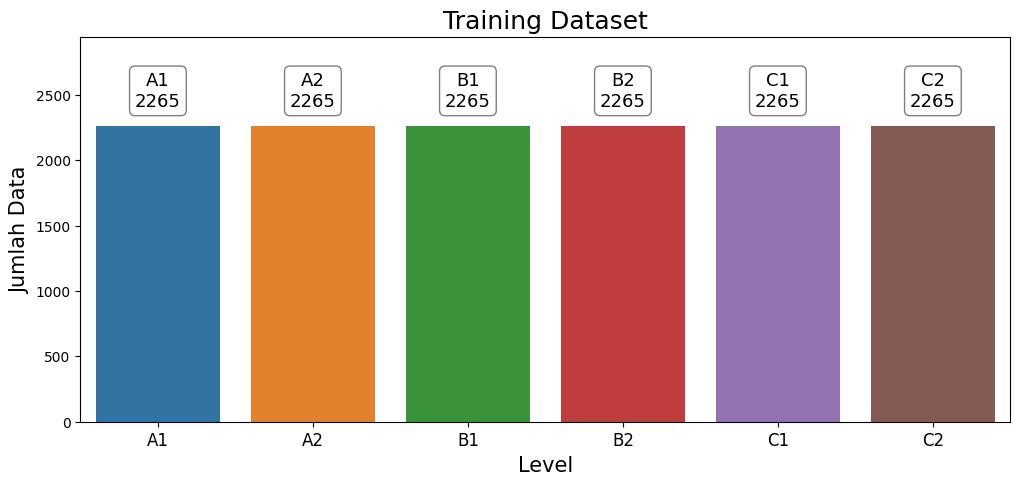

In [26]:
# Visualize all dataset
vis_data(df_training, "Training Dataset")

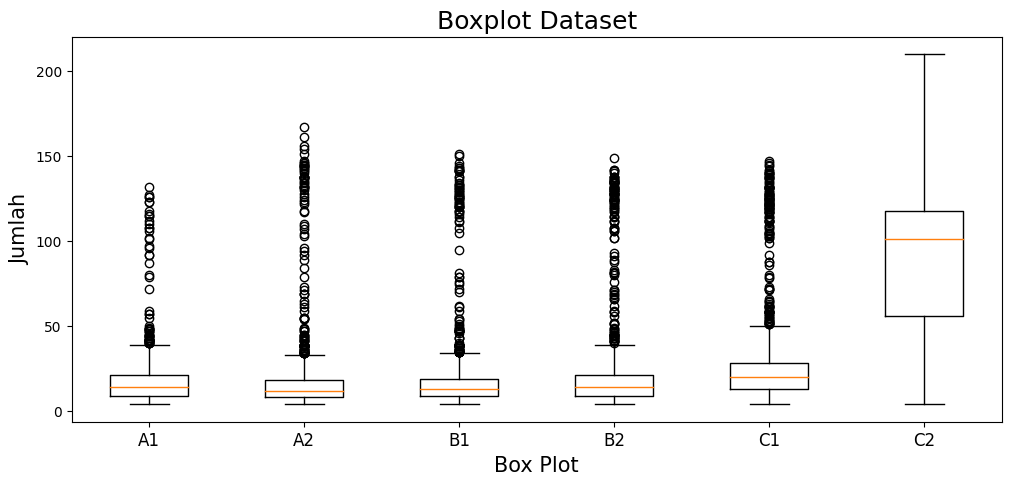

In [27]:
# Display boxplot
box_plot(df_training, "Boxplot Dataset")

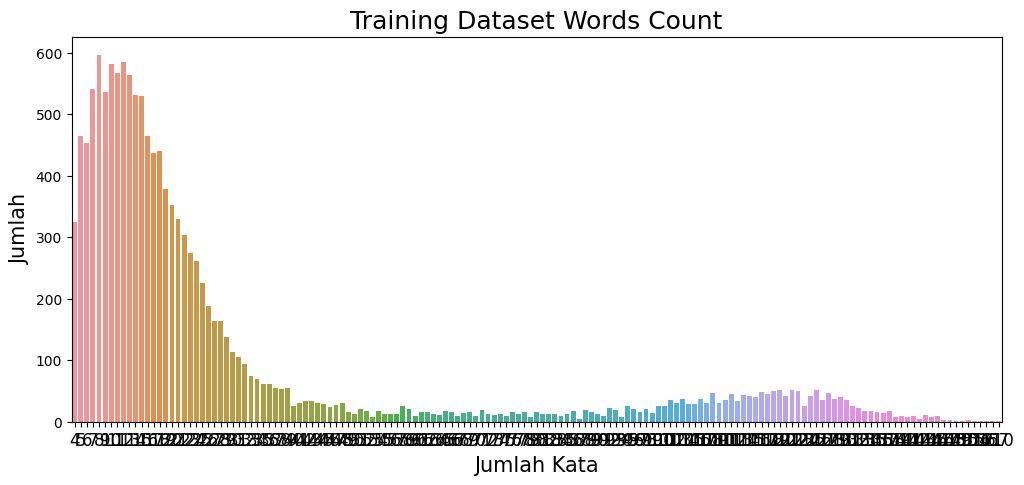

In [28]:
# Visualize words count
vis_data_count(df_training, "Training Dataset Words Count")

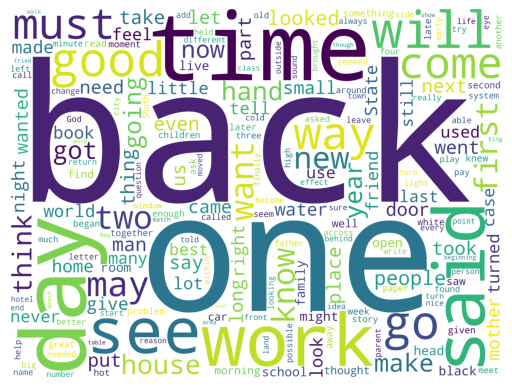

In [29]:
# Display word cloud
word_cloud_graf(df_training, "A1")

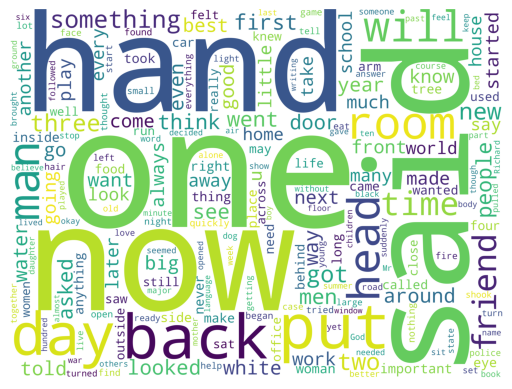

In [30]:
# Display word cloud
word_cloud_graf(df_training, "A2")

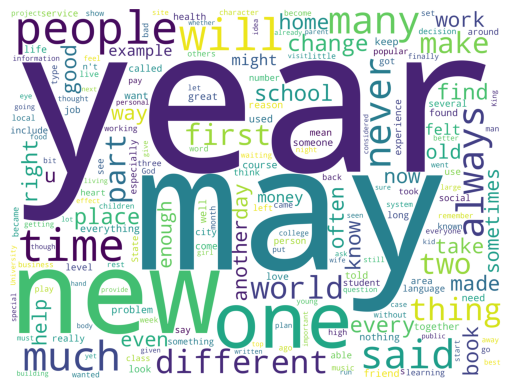

In [31]:
# Display word cloud
word_cloud_graf(df_training, "B1")

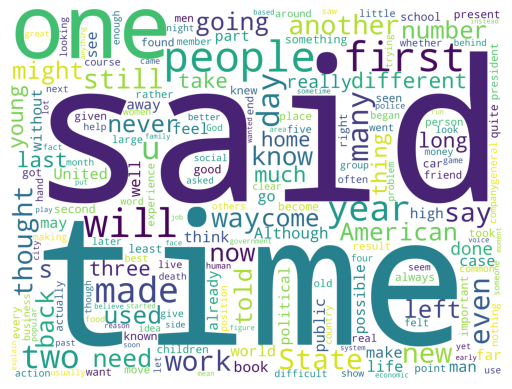

In [32]:
# Display word cloud
word_cloud_graf(df_training, "B2")

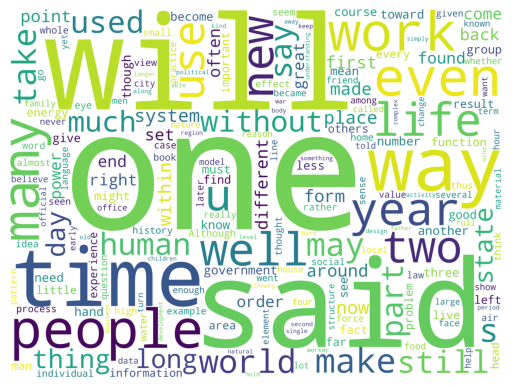

In [33]:
# Display word cloud
word_cloud_graf(df_training, "C1")

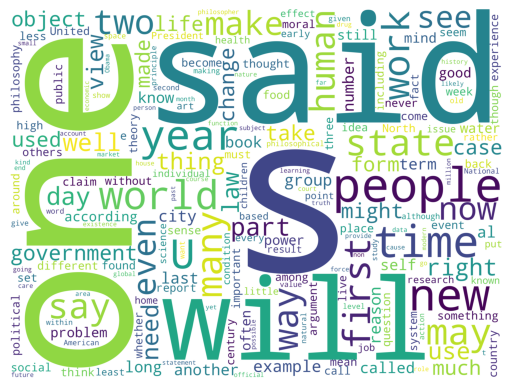

In [34]:
# Display word cloud
word_cloud_graf(df_training, "C2")

### Split dataset ✅

In [35]:
# Identify X dan y
x_training = df_training["Text"]
y_training = df_training[["A1", "A2", "B1", "B2", "C1", "C2"]]

In [36]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size=0.2, random_state=4)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

In [37]:
# Data check
print("Total training data     ", len(x_train.index), "line.")
print("Total validation data   ", len(x_valid.index), "line.")
print("Total test data         ", len(x_test.index), "line.")

Total training data      8697 line.
Total validation data    2175 line.
Total test data          2718 line.


In [38]:
# Set new value num step
params["NUM_STEPS"] = len(x_train) // params["BATCH_SIZE"]

In [39]:
# Value count dataset
df_training["Level"].value_counts()

A1    2265
A2    2265
B1    2265
B2    2265
C1    2265
C2    2265
Name: Level, dtype: int64

### Save dataset ✅

In [40]:
# Save dataset
df_training.to_csv(CSV_DATASET, index=False)

In [ ]:
# Save DATASET
!cp -r {COLAB_BASE_PATH + CSV_DATASET} {CSV_DATASET_PATH}

In [41]:
# Save data png
!cp -r {COLAB_BASE_PATH + CSV_DATASET} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CLASS_DISTRIBUTION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + BOXPLOT + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + WORDS_COUNT + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A1 + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + A2 + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B1 + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + B2 + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C1 + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + C2 + PNG} {DRIVE_TARGET_PATH}

## Tokenization 🆗

### Install and import library ✅

In [42]:
#@title Install library
%%capture
!pip install transformers

In [43]:
# Import library 
import tensorflow as tf
from transformers import DistilBertTokenizerFast

### Define function ✅

In [44]:
# Define encode function
def batch_encode(tokenizer, texts, batch_size=params["BATCH_SIZE"], max_length=params["MAX_LENGTH"]):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length",
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs["input_ids"])
        attention_mask.extend(inputs["attention_mask"])
        
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

### Init tokenizer ✅

In [45]:
# Init distilBERT token
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

### Tokenize dataset ✅

In [46]:
# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, x_train.tolist())

# Encode X_valid
X_valid_ids, X_valid_attention = batch_encode(tokenizer, x_valid.tolist())

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, x_test.tolist())

## Training 🆗

### Import library ✅

In [47]:
# Import library
import time
import datetime
from tensorflow.keras import backend as K
from tensorboard.plugins.hparams import api as hp
from transformers import DistilBertConfig, TFDistilBertModel

### Define function ✅


In [48]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))

In [49]:
# Define focal loss function
def focal_loss(gamma=params["FL_GAMMA"], alpha=params["FL_ALPHA"]):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [50]:
# Define neural network function
def build_model(transformer, max_length=params["MAX_LENGTH"]):
    
    # Define weight
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=params["RANDOM_STATE"]) 

    # Define regularizer
    l2_initializer = tf.keras.regularizers.l2(l=params["KERNEL_REGULARIZERS"]) 
    
    # Define input
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name="input_ids", 
                                            dtype="int32",
                                           )
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name="input_attention", 
                                                  dtype="int32",
                                                 )
    # The output of the DistilBERT model is a tuple with the element at index 0
    # hidden-state output representation of the last model layer
    # with a tf.Tensor of size (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer.distilbert([input_ids_layer, input_attention_layer])[0]
    
    # We will use DistilBERT output for the [CLS] token located at index 0.
    # So we will do token splicing [CLS] which gives a 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    D1 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_1",
                                )(cls_token)

    Dense1 = tf.keras.layers.Dense(128,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   kernel_regularizer=l2_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_1",
                                  )(D1)
    
    D2 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_2",
                                )(Dense1)
                                
    output = tf.keras.layers.Dense(6, 
                                   activation=params["OUTPUT_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Output",
                                  )(D2)
    
    # Define model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output, name=MODEL_NAME)
    
    # Compile model
    model.compile(tf.keras.optimizers.Adam(learning_rate=params["LEARNING_RATE"]), 
                  loss=focal_loss(),
                  metrics=["accuracy"],
                 )
    
    return model

### Build model ✅

In [51]:
# Config DistilBERT model
config = DistilBertConfig(dropout=params["DISTILBERT_DROPOUT"], 
                          attention_dropout=params["DISTILBERT_ATT_DROPOUT"], 
                          output_hidden_states=True,
                         )

# Init DistilBERT model
distilBERT = TFDistilBertModel.from_pretrained("distilbert-base-uncased", config=config)

# Freezes the layer in the DistilBERT model to maintain the pre-trained weights
for layer in distilBERT.layers:
    layer.trainable = False

# Init pre-training tensorboard
log_dir_pre = TENSORBOARD_LOG_PRE + "/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_pre_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir_pre, histogram_freq=1)

early_stoping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                              min_delta=0,
                              patience=0,
                              verbose=0, 
                              mode="auto")

# Build model
model = build_model(distilBERT)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


### Display model structure ✅

In [52]:
# Display model structure
def myprint(s):
    with open(MODEL_SUMMARY, "a") as f:
        print(s, file=f)

model.summary(print_fn=myprint)
model.summary()

Model: "IELTS_Lexical_Model_Version_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 yer)                           ast_hidden_state=(N               'input_attention[0][0]']        
                                one, 512, 768),                                                   
                                 hidden_states=((No                   

### Pre-training model ✅

In [53]:
# Training model
print("Start training...")
date_time_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_init+"\n")

time_training_init = time.time()

train_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
    callbacks=[tensorboard_pre_callback, early_stoping],
)

time_training_end = time.time()
time_training = time_training_init - time_training_end

print("\nEnd training...")
date_time_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_end+"\n")

print("Training time:")
timer(time_training_init, time_training_end)

Start training...
2023-06-09 at 02:48:27 UTC

Epoch 1/70
543/543 [==============================] - 96s 159ms/step - loss: 1.1630 - accuracy: 0.1952 - val_loss: 0.4721 - val_accuracy: 0.2625
Epoch 2/70
543/543 [==============================] - 82s 152ms/step - loss: 0.2495 - accuracy: 0.2319 - val_loss: 0.1135 - val_accuracy: 0.3228
Epoch 3/70
543/543 [==============================] - 82s 152ms/step - loss: 0.0788 - accuracy: 0.2724 - val_loss: 0.0553 - val_accuracy: 0.3963
Epoch 4/70
543/543 [==============================] - 83s 152ms/step - loss: 0.0516 - accuracy: 0.2979 - val_loss: 0.0469 - val_accuracy: 0.3080
Epoch 5/70
543/543 [==============================] - 83s 152ms/step - loss: 0.0466 - accuracy: 0.3079 - val_loss: 0.0451 - val_accuracy: 0.3297
Epoch 6/70
543/543 [==============================] - 83s 152ms/step - loss: 0.0450 - accuracy: 0.3198 - val_loss: 0.0443 - val_accuracy: 0.2869
Epoch 7/70
543/543 [==============================] - 83s 152ms/step - loss: 0.0439 

### Config model for Fine-tuning ✅

In [54]:
# Unfreeze the DistilBERT model layer weights for fine-tuning
for layer in distilBERT.layers:
    layer.trainable = True

# Define optimizer for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=params["FT_LEARNING_RATE"])

# Compile model
model.compile(optimizer=optimizer, 
              loss=focal_loss(),
              metrics=["accuracy"],
             )

# Init pre-training tensorboard
log_dir_fine = TENSORBOARD_LOG_FINE + "/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_fine_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir_fine, histogram_freq=1)

### Fine-tuning ✅

In [55]:
# Fine-tuning model
print("Start training...")
date_time_fine_init = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_init+"\n")

time_fine_tunning_init = time.time()

finetuning_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["FT_EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
    callbacks=[tensorboard_fine_callback, early_stoping],
)

time_fine_tunning_end = time.time()
time_fine_tunning = time_fine_tunning_end-time_fine_tunning_init

print("\nEnd training...")
date_time_fine_end = datetime.datetime.now().strftime("%Y-%m-%d at %H:%M:%S UTC")
print(date_time_fine_end+"\n")

print("Fine-Tunning time:")
timer(time_fine_tunning_init, time_fine_tunning_end)

Start training...
2023-06-09 at 03:02:05 UTC

Epoch 1/50
543/543 [==============================] - 213s 350ms/step - loss: 0.0383 - accuracy: 0.4149 - val_loss: 0.0394 - val_accuracy: 0.4064
Epoch 2/50
543/543 [==============================] - 181s 334ms/step - loss: 0.0353 - accuracy: 0.4840 - val_loss: 0.0364 - val_accuracy: 0.4671
Epoch 3/50
543/543 [==============================] - 179s 330ms/step - loss: 0.0331 - accuracy: 0.5271 - val_loss: 0.0349 - val_accuracy: 0.4818
Epoch 4/50
543/543 [==============================] - 179s 331ms/step - loss: 0.0314 - accuracy: 0.5547 - val_loss: 0.0331 - val_accuracy: 0.5232
Epoch 5/50
543/543 [==============================] - 180s 331ms/step - loss: 0.0301 - accuracy: 0.5767 - val_loss: 0.0328 - val_accuracy: 0.5343
Epoch 6/50
543/543 [==============================] - 180s 331ms/step - loss: 0.0289 - accuracy: 0.5924 - val_loss: 0.0319 - val_accuracy: 0.5398
Epoch 7/50
543/543 [==============================] - 179s 330ms/step - loss: 

## Evaluate and predict 🆗

### Install and import library ✅

In [56]:
#@title Install library
%%capture
!pip install scikit-plot
!pip install -U tensorboard==2.12

In [57]:
# Import library
import scikitplot as skplt
from sklearn import metrics

### Evaluate model ✅

In [58]:
# Evaluate model
eval_loss, eval_accuracy = model.evaluate([X_test_ids, X_test_attention],
                                          y_test.to_numpy(),
                                          batch_size=params["BATCH_SIZE"],
                                          verbose=params["VERBOSE"],
                                         )
print("Evaluation Loss:", eval_loss)
print("Evaluation Accuracy:", eval_accuracy)

170/170 [==============================] - 18s 109ms/step - loss: 0.0293 - accuracy: 0.5820
Evaluation Loss: 0.02927548810839653
Evaluation Accuracy: 0.5820456147193909


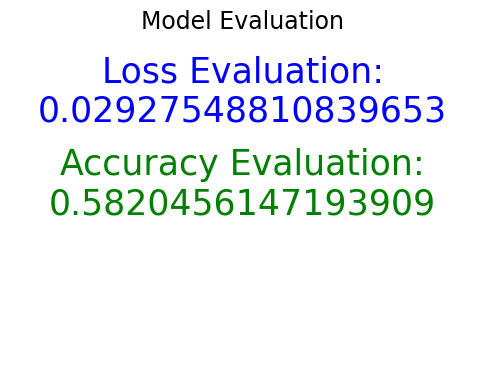

In [59]:
# Display evaluation
fig, ax = plt.subplots(figsize=(6, 4))

ax.text(0.5, 1, f"Loss Evaluation:\n{eval_loss}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=25)

ax.text(0.5, 0.7, f"Accuracy Evaluation:\n{eval_accuracy}",
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="green", fontsize=25)

plt.title(label="Model Evaluation", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(MODEL_EVALUATION_PNG, dpi=300.0, transparent=True)

### Predict model ✅

In [60]:
# Value for predict
print("Value token X ids:")
print(X_test_ids[20:21])

print("Value token X attention:")
print(X_test_attention[20:21])

print("Value y:")
print(y_test.to_numpy()[20:21])

Value token X ids:
tf.Tensor(
[[  101  1045  2001  8013  2326  1005  1055  5409 10103  1012   102     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0 

In [61]:
# Predict
pred = model.predict([X_test_ids[20:21], X_test_attention[20:21]])
print("Prediction probability:", pred)

tar = np.argmax(y_test.to_numpy()[20:21], axis = 1)
print("Target class: ", tar)

classes = np.argmax(pred, axis = 1)
print("Predict class: ", classes)

1/1 [==============================] - 2s 2s/step
Prediction probability: [[0.3010359  0.09425748 0.26501745 0.23045714 0.08895171 0.02028032]]
Target class:  [2]
Predict class:  [0]


### Get training process data ✅

In [62]:
# Make dataset history
history_train = pd.DataFrame(train_history.history)
history_finetuning = pd.DataFrame(finetuning_history.history)
history = pd.concat([history_train, history_finetuning], ignore_index=True)

In [63]:
# Get training loss information
epoch_train_loss = int(history[history["loss"] == history["loss"].min()].index.values[0])
epoch_val_loss = int(history[history["val_loss"] == history["val_loss"].min()].index.values[0])
train_loss_min = float("{:0.4f}".format(history["loss"].min()))
val_loss_min = float("{:0.4f}".format(history["val_loss"].min()))

In [64]:
# Get training accuracy information
epoch_train_accuracy = int(history[history["accuracy"] == history["accuracy"].max()].index.values[0])
epoch_val_accuracy = int(history[history["val_accuracy"] == history["val_accuracy"].max()].index.values[0])
train_accuracy_max = float("{:0.4f}".format(history["accuracy"].max()))
val_accuracy_max = float("{:0.4f}".format(history["val_accuracy"].max()))

In [65]:
# Get predict from test dataset
y_pred = model.predict([X_test_ids, X_test_attention])
y_pred_thresh = np.argmax(y_test.to_numpy(), axis=1)
classes = np.argmax(y_pred, axis=1)

85/85 [==============================] - 16s 187ms/step


### Visualize training process ✅

Min Train Loss: 0.0253
Min Validation Loss: 0.0299


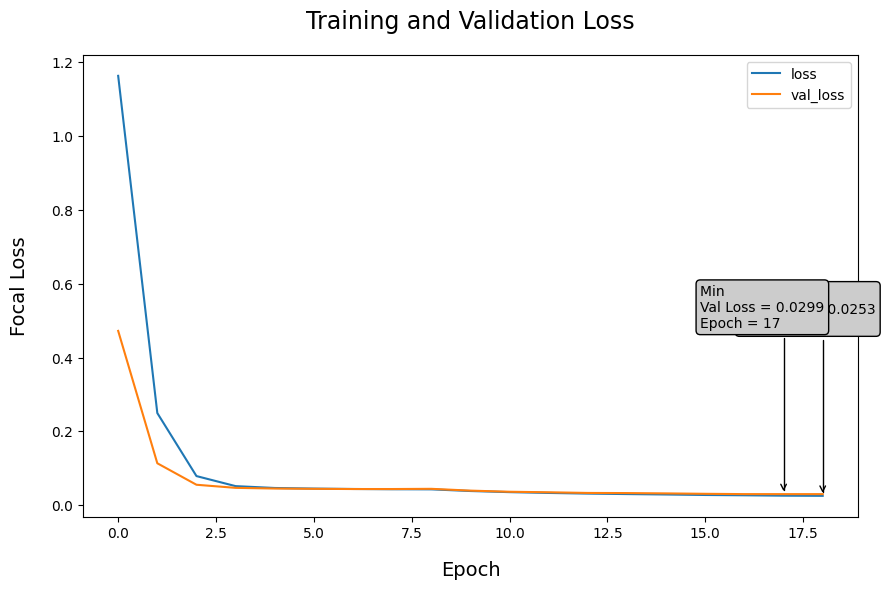

In [66]:
# Ploting training loss information 
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.loc[:, ["loss", "val_loss"]])
ax.legend(labels=["loss", "val_loss"])

ax.annotate(
    f"Min \nTrain Loss = {train_loss_min}\nEpoch = {epoch_train_loss}",
    xy=(epoch_train_loss, train_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Min \nVal Loss = {val_loss_min}\nEpoch = {epoch_val_loss}",
    xy=(epoch_val_loss, val_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Loss", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Focal Loss", labelpad=16, fontsize=14)

print("Min Train Loss:", train_loss_min)
print("Min Validation Loss:", val_loss_min)

# Save data in image
plt.savefig(LOSS_EVALUATION_PNG, dpi=300.0, transparent=True)

Max Train Accuracy: 0.6586
Max Validation Accuracy: 0.5706


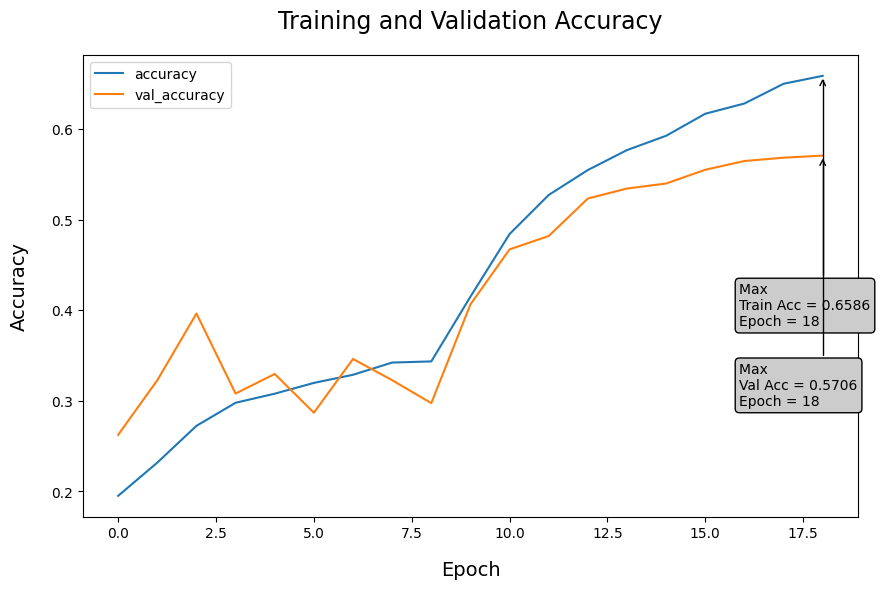

In [67]:
# Ploting training accuracy information
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.loc[:, ["accuracy", "val_accuracy"]])
ax.legend(labels=["accuracy", "val_accuracy"])

ax.annotate(
    f"Max \nTrain Acc = {train_accuracy_max}\nEpoch = {epoch_train_accuracy}",
    xy=(epoch_train_accuracy, train_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Max \nVal Acc = {val_accuracy_max}\nEpoch = {epoch_val_accuracy}",
    xy=(epoch_val_accuracy, val_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Accuracy", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Accuracy", labelpad=16, fontsize=14)

print("Max Train Accuracy:", train_accuracy_max)
print("Max Validation Accuracy:", val_accuracy_max)

# Save data in image
plt.savefig(ACCURACY_EVALUATION_PNG, dpi=300.0, transparent=True)

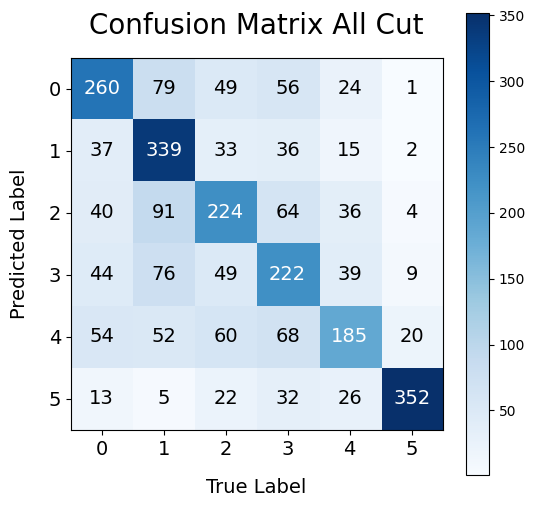

In [68]:
# Ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred_thresh,
                                    classes,
                                    figsize=(6, 6),
                                    text_fontsize=14,
                                   )

plt.title(label="Confusion Matrix All Cut", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Save data in image
plt.savefig(CM_EVALUATION_PNG, dpi=300.0, transparent=True)

In [69]:
# Print classification report
print(metrics.classification_report(y_pred_thresh, classes, digits=3))

              precision    recall  f1-score   support

           0      0.580     0.554     0.567       469
           1      0.528     0.734     0.614       462
           2      0.513     0.488     0.500       459
           3      0.464     0.506     0.484       439
           4      0.569     0.421     0.484       439
           5      0.907     0.782     0.840       450

    accuracy                          0.582      2718
   macro avg      0.594     0.581     0.582      2718
weighted avg      0.594     0.582     0.582      2718



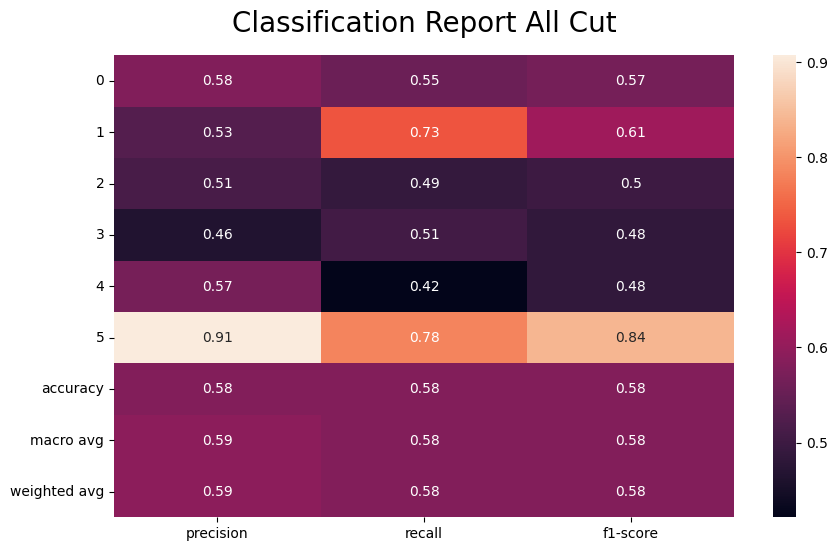

In [70]:
# Display and save classification_report 
fig, ax = plt.subplots(figsize=(10, 6))

clf_report = metrics.classification_report(y_pred_thresh,
                                           classes,
                                           output_dict=True)

classification_report = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, ax=ax, annot=True)

classification_report.set_title("Classification Report All Cut", fontsize=20, pad=17)
fig = classification_report.get_figure()

fig.savefig(CR_EVALUATION_PNG, dpi=300.0) 

In [71]:
# Define timer
def display_timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

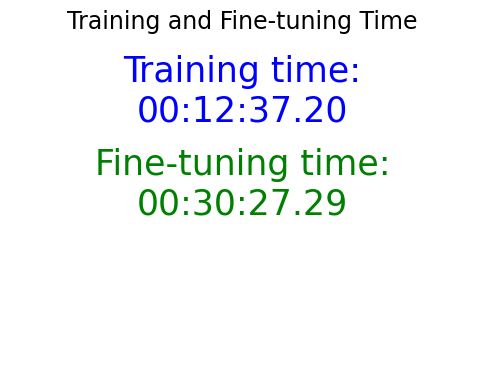

In [72]:
# Display training time
fig, ax = plt.subplots(figsize=(6, 4))

hours_train, minutes_train, seconds_train = display_timer(time_training_init, time_training_end)
hours_ft, minutes_ft, seconds_ft = display_timer(time_fine_tunning_init, time_fine_tunning_end)

ax.text(0.5, 1, "Training time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_train),int(minutes_train),seconds_train),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="blue", fontsize=25)

ax.text(0.5, 0.7, "Fine-tuning time:\n{:0>2}:{:0>2}:{:05.2f}".format(int(hours_ft),int(minutes_ft),seconds_ft),
        verticalalignment="top", horizontalalignment="center",
        transform=ax.transAxes,
        color="green", fontsize=25)

plt.title(label="Training and Fine-tuning Time", fontsize=17, pad=19)
plt.axis("off")

# Save data in image
plt.savefig(TRAINING_TIME_PNG, dpi=300.0, transparent=True)

## Save model 🆗

### Import library ✅

In [73]:
# Import library
import pickle

### Save model ✅

In [74]:
# Save model and tokenizer
model.save(H5_MODEL_NAME)
model.save(FOLDER_MODEL_NAME)
with open(TOKENIZER_NAME, "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
# Tar file
!tar -czvf {FOLDER_MODEL_NAME + ".tar.gz"} {FOLDER_MODEL_NAME + "/"}

ielts_lexical_model/
ielts_lexical_model/fingerprint.pb
ielts_lexical_model/assets/
ielts_lexical_model/saved_model.pb
ielts_lexical_model/keras_metadata.pb
ielts_lexical_model/variables/
ielts_lexical_model/variables/variables.data-00000-of-00001
ielts_lexical_model/variables/variables.index


In [76]:
# Save model
!cp -r {COLAB_BASE_PATH + FOLDER_MODEL_NAME + ".tar.gz"} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + H5_MODEL_NAME} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + TOKENIZER_NAME} {DRIVE_TARGET_PATH}

In [77]:
# Save data png
!cp -r {COLAB_BASE_PATH + MODEL_SUMMARY} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + MODEL_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + LOSS_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + ACCURACY_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CM_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + CR_EVALUATION + PNG} {DRIVE_TARGET_PATH}
!cp -r {COLAB_BASE_PATH + TRAINING_TIME + PNG} {DRIVE_TARGET_PATH}

## Tensorboard 🆕

In [78]:
# Save pre-training to tensorboard
!tensorboard dev upload --logdir ./{TENSORBOARD_LOG_PRE} \
  --name {TITLE_PRE} \
  --description {DESCRIPTION_PRE} \
  --one_shot

# Save fine-tuning to tensorboard
!tensorboard dev upload --logdir ./{TENSORBOARD_LOG_FINE} \
  --name {TITLE_FINE} \
  --description {DESCRIPTION_FINE} \
  --one_shot

2023-06-09 03:35:54.353429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs-pre-training

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) y

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   CSX-MGQ-YML



New experiment created. View your TensorBoard at: https://tensorboard.dev/ex

In [ ]:
# Open tensorboard
!tensorboard dev list

## Load model 🆗

### Install and import library ✅

In [ ]:
# Install library
%%capture
!pip install transformers
!pip install -U openai-whisper

In [ ]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from transformers import DistilBertTokenizerFast
import whisper
import pickle

### Define function ✅

In [ ]:
# Define loss function
def custom_focal_loss(gamma=2.0, alpha=0.2):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [ ]:
# Define encode function
def encode_batch(tokenizer, texts, batch_size=16, max_length=512):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length",
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs["input_ids"])
        attention_mask.extend(inputs["attention_mask"])
        
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [ ]:
# Define ASR function
def speech_to_text(model_base, audio_path):
    result = model_base.transcribe(audio_path)
    
    return result["text"]

In [ ]:
# Define load model and tokenizer
def load_model_and_tokenizer(model_path, token_path):
    # Load model
    load_model_h5 = tf.keras.models.load_model(model_path, custom_objects={"focal_loss_fixed":custom_focal_loss()})

    # Load tokenizer
    with open(token_path, "rb") as handle:
        load_tokenizer = pickle.load(handle)

    # Initialize ASR
    asr_model = whisper.load_model("base.en")

    return load_model_h5, load_tokenizer, asr_model

In [ ]:
# Define get lexical value
def lexical_calculation(wav):
    # Define path
    model_h5_dir = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut 2/ielts_lexical_all_cut.h5"
    tokenizer_dir = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut 2/tokenizer_ielts_lexical_all_cut.pickle"

    # Load model and token
    model, tokenizer, asr_model = load_model_and_tokenizer(model_h5_dir, tokenizer_dir)

    # Info model h5
    model.summary()

    # Speect to text
    asr = speech_to_text(asr_model, wav)

    # Data test to list
    asr_list = [asr]

    # Tokenizer
    token_ids, token_attention = encode_batch(tokenizer, asr_list)

    # Predict
    pred = model.predict([token_ids, token_attention])
    classes = np.argmax(pred, axis=1)

    # To band convert
    if classes[0]==0:
        return 3
    elif classes[0]==1:
        return 4
    elif classes[0]==2:
        return 5
    elif classes[0]==3:
        return 6.5
    elif classes[0]==4:
        return 8
    else:
        return 9

### Drive Access ✅

In [ ]:
# Akses drive
from google.colab import drive

drive.mount("/content/drive")

### Calculation ✅

In [ ]:
# IELTS Lexical prediction
band = lexical_calculation("https://res.cloudinary.com/dntqqcuci/video/upload/v1683802365/hfxnaqru0kkh4qobnmwo.wav")
print("IELTS Lexical band is", band)